In [60]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time
import seaborn as sns
import os


In [2]:
def GraphToFile(G, filename):
    nx.Graph(G)
    saveFile = open(filename, 'w')
    txt = 'graph Prim_1 {'
    saveFile.write(txt)
    try:
        [saveFile.write('\n' + u + '--' + v + ' [Label = "' + str(G[u][v]['weight']) + '"];') for u, v, d in
     G.edges(data=True)]
    except:
        [saveFile.write('\n' + str(u) + '--' + str(v) + ';') for u, v, d in
     G.edges(data=True)]
    #[print(u,v) for u, v, d in G.edges(data=True)]
    saveFile.write('\n }')
    saveFile.close()

In [3]:
def SerieToNet(serie):
    G=nx.Graph()
    for i in range(len(serie)):
        G.add_node(str(i), y=serie[i])

    for N0 in G.nodes():
        if int(N0)+1<len(G.nodes()):
            G.add_edge(N0,str(int(N0)+1))  
            
    for N0 in G.nodes():
        if int(N0)<len(G.nodes)-2:
            ya=G.node[N0]['y']
            ta=int(N0)
            for N1 in range (int(N0)+2,len(G.nodes())):
                flag=0
                yb=G.node[str(N1)]['y']
                tb=N1
                for Nc in range(int(N0)+1,int(N1)):
                    yc=G.node[str(Nc)]['y']
                    tc=Nc
                    tresh=yb + (ya-yb)*((tb-tc)/(tb-ta))
                    visible=yc<tresh

                    if visible == False:
                        flag=1
                if flag==0:
                    G.add_edge(N0,str(N1))

    return(G)

In [66]:
def PlotSerie(title,serie):
    ps=plt.figure()
    ax=ps.add_axes([0,0,1,1])
    ax.stem(serie)
    ax.set_title('time-Series')
    ax.set_xlabel('time')
    ax.set_ylabel('magnitude')
    ps.savefig(title+'_series.png', dpi=200, bbox_inches='tight')



In [67]:
def PlotSerieDist(title,serie):
    
    dss= plt.figure()
    cx=dss.add_axes([0,0,1,1])
    cx=sns.distplot( serie ,rug=True, kde=True,
    kde_kws={"color": "r", "alpha":0.2, "linewidth": 5, "shade":True }
    )
    cx.set_title('Series Distribution')
    cx.set_xlabel('Magnitude')
    dss.savefig(title+'_seriesDist.png',dpi=200, bbox_inches='tight')

In [68]:
def PlotDegDist(title,gradlist):
    
        
    dsd= plt.figure()
    bx=dsd.add_axes([0,0,1,1])
    bx=sns.distplot( gradlist ,rug=True, kde=True,
    kde_kws={"color": "g", "alpha":0.2, "linewidth": 5, "shade":True }
    )
    bx.set_title('Degree Distribution')
    bx.set_xlabel('Nodes with Degree')
    dsd.savefig(title+'_DegreeDist.png',dpi=200, bbox_inches='tight')
        


In [86]:
def routine1(siz,n):
    for i in range(n):
        start_time = time.time()
        s=np.random.randint(1,100,siz)
        serie=np.cumsum(s)
        G1=SerieToNet(serie)
        titl=path+'brown_'+str(siz)+'_'+str(i)
        GraphToFile(G1,titl+'.gv')
        gradlist=[ node[1] for node in G1.degree()]
        
        PlotSerie(titl,serie)
        PlotSerieDist(titl,serie)
        PlotDegDist(titl,gradlist)
        print("--- %s seconds ---" % (time.time() - start_time))



[   21   116   202   277   360   366   385   447   458   525   597   681
   696   784   793   883   936   963   981  1016  1111  1169  1217  1250
  1315  1356  1407  1503  1513  1609  1705  1738  1773  1794  1820  1845
  1935  1947  1976  1997  2038  2099  2158  2235  2265  2317  2356  2373
  2455  2482  2551  2585  2626  2681  2751  2846  2849  2865  2895  2927
  3002  3018  3096  3195  3200  3219  3292  3377  3388  3466  3470  3505
  3539  3634  3641  3729  3769  3819  3824  3881  3939  3976  4019  4045
  4109  4132  4225  4273  4291  4325  4418  4424  4518  4536  4598  4606
  4615  4626  4691  4774  4826  4860  4870  4940  4943  4967  5063  5117
  5139  5164  5207  5267  5325  5382  5388  5426  5427  5518  5532  5566
  5587  5639  5657  5716  5766  5806  5847  5858  5954  6004  6078  6111
  6195  6248  6297  6323  6401  6462  6496  6582  6632  6726  6769  6795
  6820  6884  6981  7023  7098  7184  7268  7318  7395  7398  7487  7554
  7616  7636  7677  7733  7761  7855  7921  8004  8

<IPython.core.display.Javascript object>


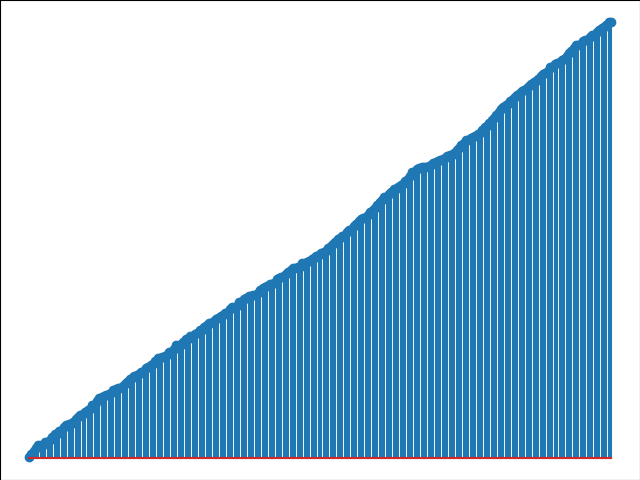

<IPython.core.display.Javascript object>


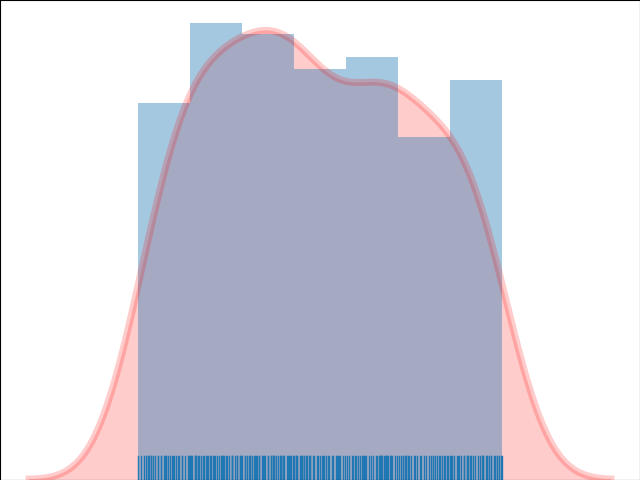

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


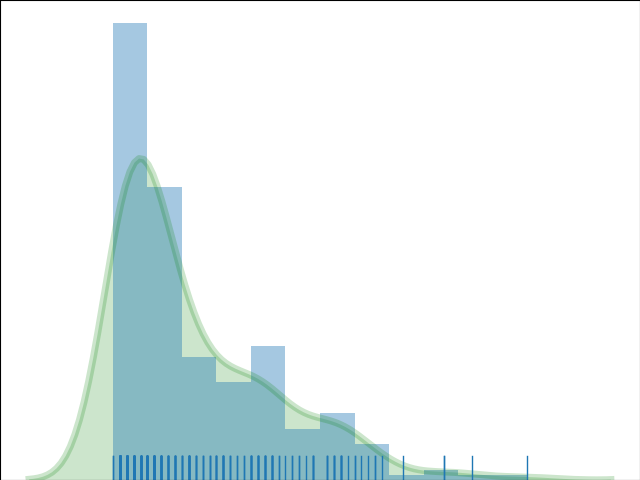

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 31.992704391479492 seconds ---
[   23    39    75   131   185   226   314   332   367   448   467   537
   582   597   657   740   790   821   867   920   984  1081  1117  1139
  1159  1248  1322  1351  1364  1388  1432  1454  1501  1577  1619  1620
  1646  1714  1726  1727  1814  1886  1908  2005  2087  2134  2188  2264
  2281  2378  2422  2484  2576  2653  2720  2722  2751  2757  2808  2839
  2930  3014  3062  3072  3145  3196  3219  3271  3297  3371  3397  3413
  3479  3486  3567  3608  3620  3718  3725  3767  3773  3798  3855  3915
  3923  3982  4051  4090  4162  4200  4263  4320  4418  4436  4451  4520
  4597  4670  4738  4789  4851  4884  4949  4977  5047  5129  5199  5225
  5240  5335  5433  5468  5556  5579  5614  5629  5633  5655  5691  5706
  5745  5761  5856  5949  6016  6072  6082  6181  6226  6235  6285  6332
  6379  6428  6487  6564  6601  6639  6692  6785  6826  6903  6913  6932
  6971  7061  7101  7152  7228  7237  7303  7384  7444  7461  7530  7626
  7722  7791  78

<IPython.core.display.Javascript object>


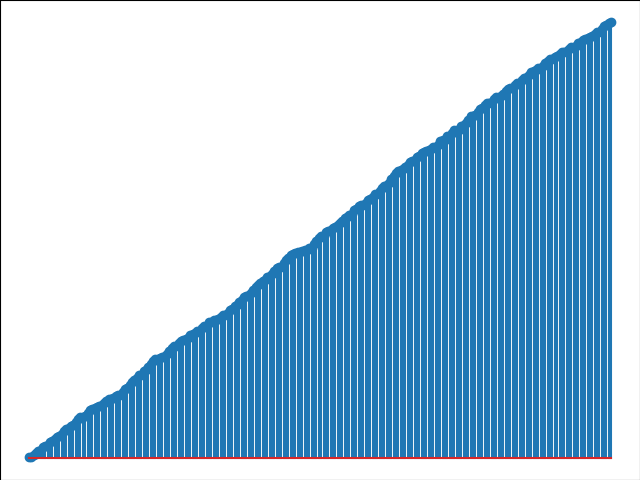

<IPython.core.display.Javascript object>


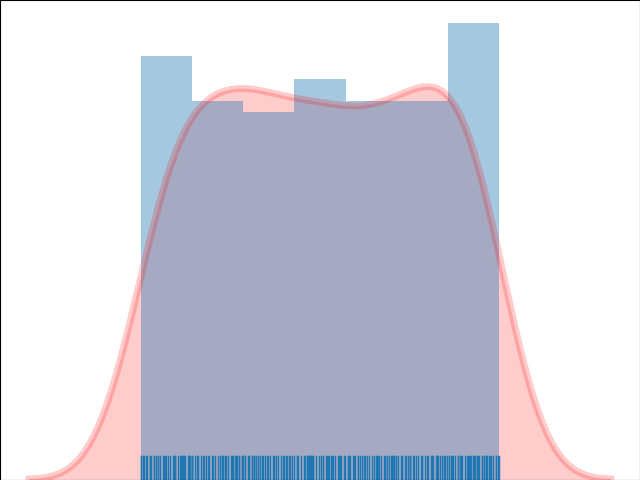

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


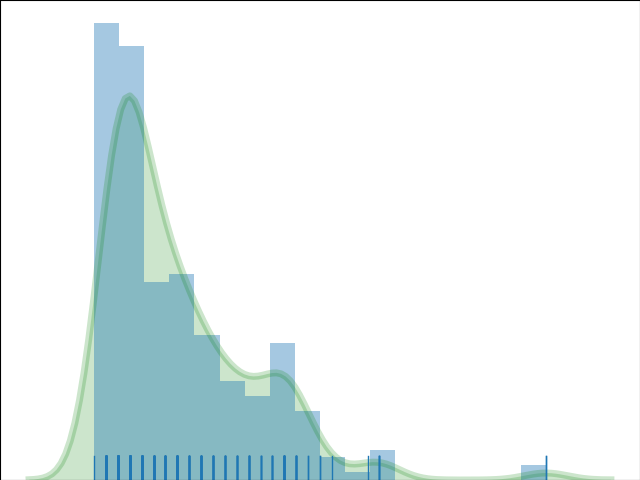

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.25201392173767 seconds ---
[   16    32   102   176   244   299   369   378   435   489   530   568
   616   687   732   752   753   766   835   914   944  1015  1106  1184
  1258  1343  1432  1523  1619  1631  1655  1724  1783  1811  1906  1947
  2042  2046  2143  2233  2321  2374  2419  2463  2488  2538  2582  2628
  2674  2773  2872  2968  3017  3063  3136  3231  3236  3290  3304  3391
  3407  3425  3493  3566  3614  3663  3710  3751  3832  3880  3914  3930
  3949  4043  4085  4164  4191  4260  4337  4359  4409  4418  4480  4492
  4557  4558  4604  4680  4713  4791  4843  4938  5028  5055  5111  5203
  5287  5383  5394  5454  5542  5543  5610  5622  5633  5649  5668  5743
  5749  5766  5808  5884  5981  6019  6081  6105  6142  6156  6161  6254
  6329  6382  6413  6487  6519  6554  6644  6713  6776  6864  6942  6995
  7034  7045  7121  7216  7264  7269  7327  7400  7467  7548  7588  7627
  7655  7695  7740  7793  7847  7941  8040  8073  8146  8212  8275  8282
  8318  8372  846

<IPython.core.display.Javascript object>


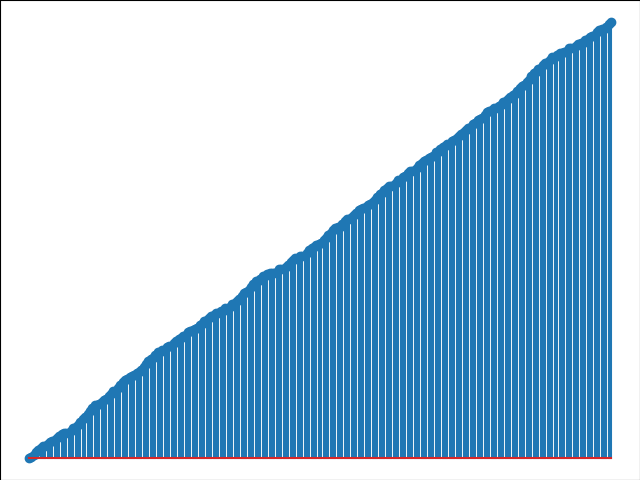

<IPython.core.display.Javascript object>


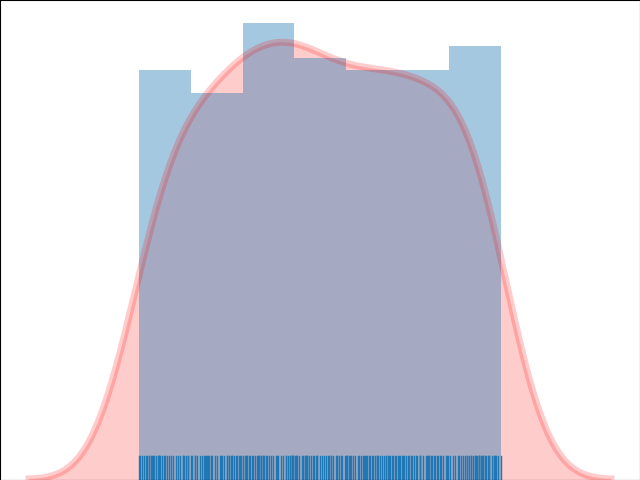

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


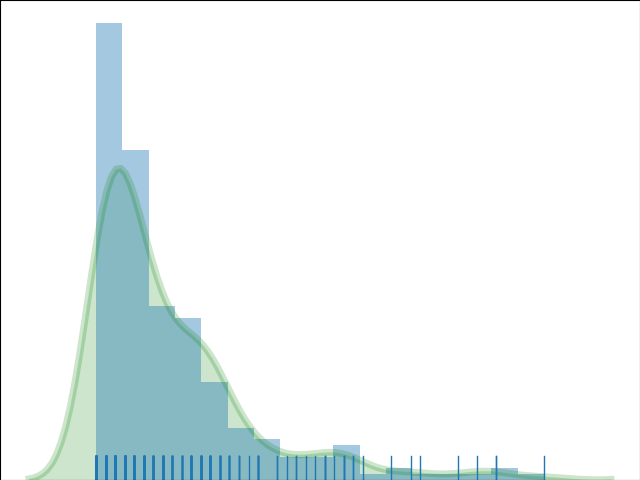

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.47164440155029 seconds ---
[   93   131   145   242   308   407   502   590   611   621   628   687
   772   824   845   851   882   890   987  1066  1117  1183  1235  1305
  1333  1398  1442  1517  1562  1597  1668  1686  1741  1829  1871  1967
  2053  2090  2092  2096  2125  2130  2172  2194  2197  2259  2309  2329
  2336  2342  2382  2478  2527  2605  2698  2740  2830  2898  2926  2988
  3033  3039  3075  3087  3185  3205  3208  3216  3280  3285  3292  3329
  3341  3420  3500  3585  3587  3634  3669  3694  3742  3766  3810  3904
  3985  3997  4082  4160  4238  4247  4315  4396  4420  4470  4512  4595
  4656  4721  4738  4791  4800  4820  4864  4903  4967  4982  5039  5120
  5124  5165  5250  5287  5354  5445  5496  5528  5614  5661  5749  5806
  5877  5913  5940  5975  6013  6050  6061  6078  6131  6172  6205  6282
  6372  6405  6484  6500  6566  6656  6744  6784  6843  6876  6892  6945
  7015  7098  7133  7177  7218  7227  7293  7352  7390  7408  7475  7551
  7643  7731  781

<IPython.core.display.Javascript object>


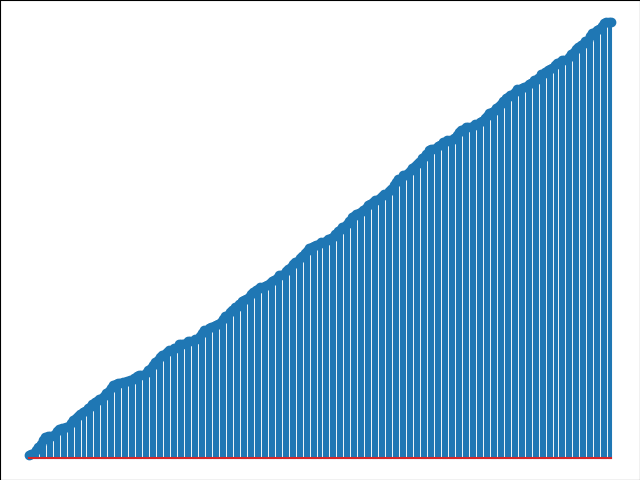

<IPython.core.display.Javascript object>


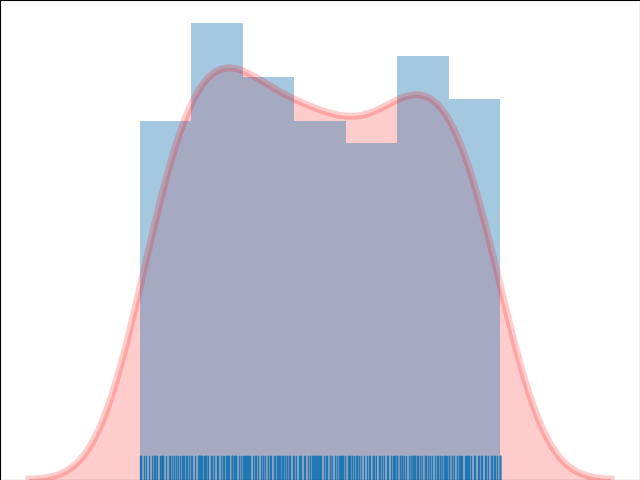

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


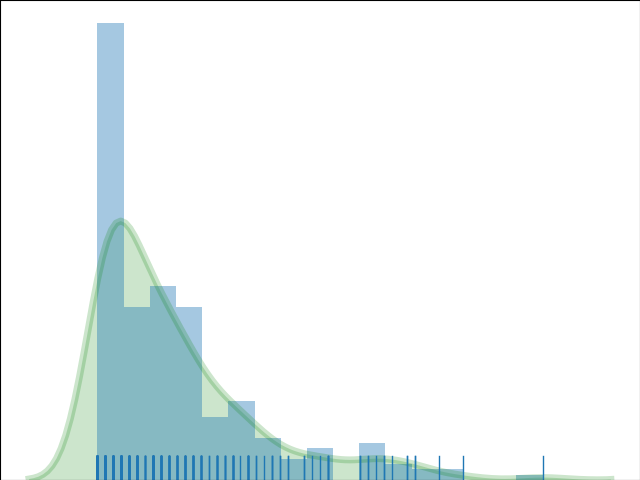

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.42836332321167 seconds ---
[   11   104   162   204   303   383   391   488   504   536   551   562
   599   614   673   736   760   809   873   928   943   947  1029  1050
  1096  1171  1237  1299  1300  1351  1358  1415  1474  1481  1495  1517
  1553  1595  1671  1724  1753  1849  1896  1994  2068  2114  2170  2222
  2268  2346  2381  2406  2408  2454  2481  2558  2586  2628  2718  2773
  2777  2799  2886  2938  3026  3076  3157  3205  3224  3281  3336  3340
  3355  3416  3507  3512  3517  3614  3672  3734  3770  3865  3872  3886
  3933  4027  4087  4143  4148  4246  4264  4362  4394  4405  4455  4518
  4609  4645  4737  4821  4862  4901  4994  5041  5084  5167  5207  5302
  5327  5425  5460  5546  5570  5648  5668  5717  5730  5804  5894  5935
  6009  6105  6156  6242  6260  6311  6374  6431  6467  6549  6604  6606
  6689  6770  6777  6825  6852  6880  6940  6943  6986  7009  7032  7126
  7217  7286  7322  7388  7485  7578  7648  7716  7743  7824  7907  7929
  7988  8033  811

<IPython.core.display.Javascript object>


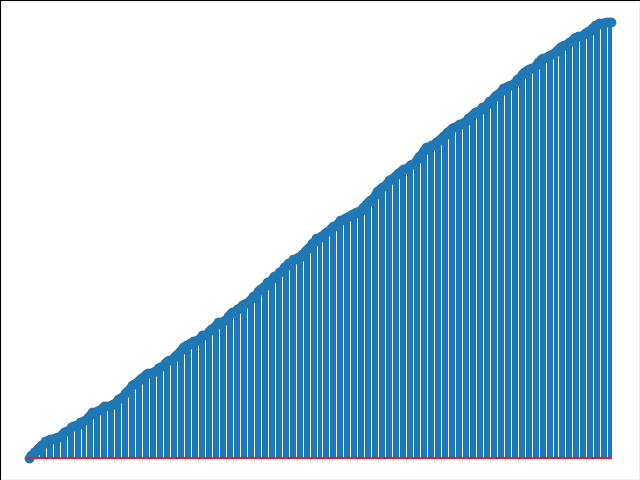

<IPython.core.display.Javascript object>


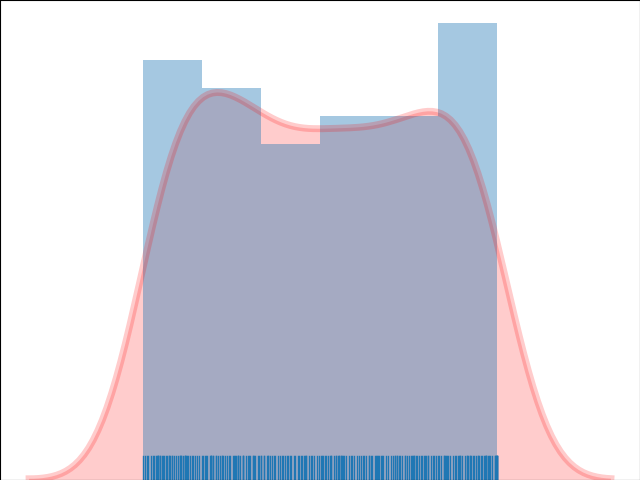

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


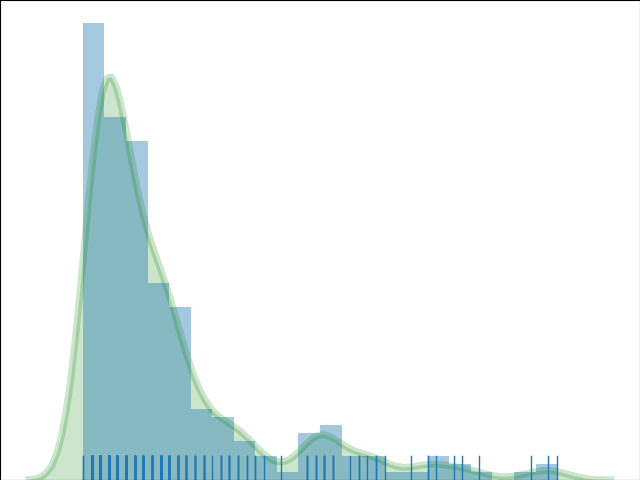

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.7735812664032 seconds ---
[   27    71   120   141   166   254   315   363   366   420   458   539
   629   676   736   831   910   967  1039  1057  1154  1233  1293  1391
  1456  1465  1500  1578  1602  1608  1678  1739  1815  1844  1863  1905
  1977  1980  2035  2091  2126  2202  2205  2240  2288  2355  2433  2464
  2494  2575  2584  2634  2675  2760  2811  2900  2951  2996  3045  3056
  3153  3195  3238  3247  3331  3355  3440  3476  3501  3579  3629  3684
  3752  3759  3778  3875  3922  3936  3957  4035  4086  4162  4236  4245
  4334  4374  4401  4456  4483  4544  4569  4629  4672  4681  4736  4749
  4822  4875  4903  4924  4970  4979  5002  5056  5140  5158  5233  5305
  5356  5435  5508  5516  5603  5633  5647  5676  5721  5760  5775  5853
  5927  6023  6069  6099  6117  6124  6138  6159  6242  6336  6368  6467
  6529  6535  6633  6669  6713  6754  6769  6828  6874  6889  6984  7066
  7148  7205  7284  7334  7425  7468  7538  7565  7576  7655  7689  7788
  7795  7862  7891

<IPython.core.display.Javascript object>


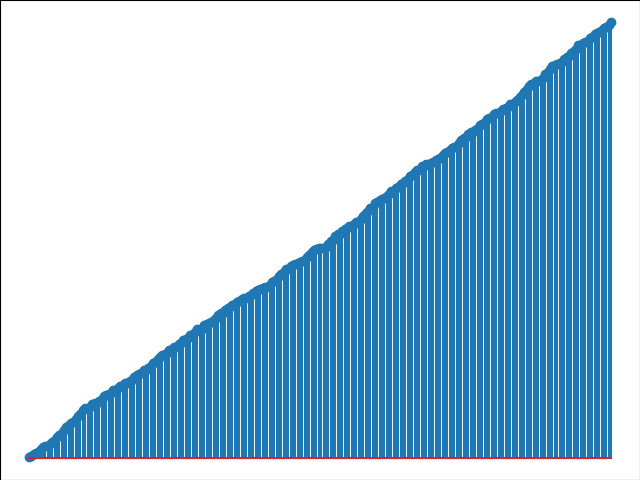

<IPython.core.display.Javascript object>


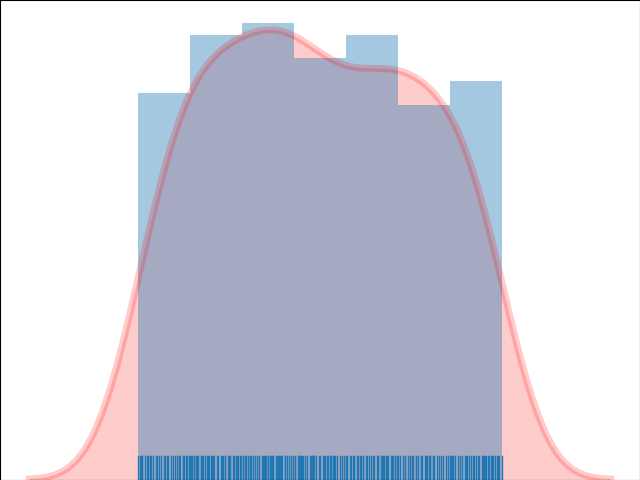

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


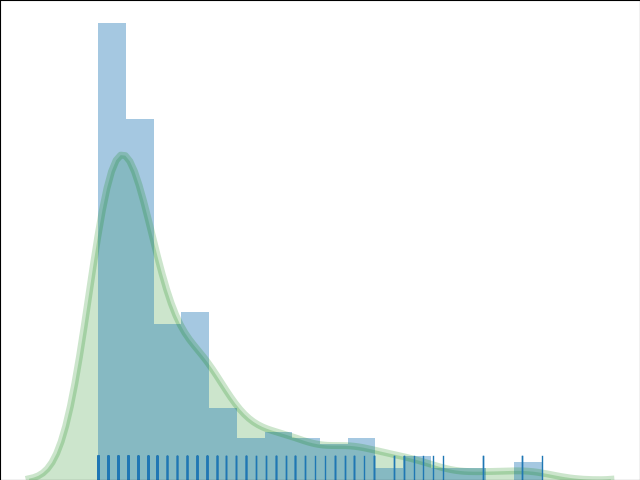

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.88838577270508 seconds ---
[   91   129   130   184   244   342   351   447   541   550   600   639
   689   695   756   839   878   937  1017  1093  1145  1171  1249  1340
  1429  1475  1522  1592  1601  1609  1633  1700  1743  1808  1903  1921
  1960  2037  2076  2077  2147  2217  2315  2360  2405  2418  2453  2471
  2506  2524  2550  2630  2669  2738  2810  2867  2894  2978  3010  3025
  3078  3177  3217  3297  3345  3373  3470  3552  3646  3692  3704  3723
  3807  3808  3886  3959  4016  4042  4140  4221  4255  4318  4399  4432
  4477  4488  4492  4590  4673  4698  4789  4794  4844  4899  4968  4974
  4977  5035  5078  5122  5215  5277  5326  5385  5452  5454  5529  5572
  5626  5633  5686  5744  5796  5889  5945  5998  6080  6148  6162  6169
  6223  6238  6251  6287  6345  6362  6374  6388  6429  6474  6563  6574
  6594  6657  6754  6771  6816  6867  6898  6927  6961  7003  7080  7141
  7193  7250  7336  7415  7423  7495  7509  7546  7554  7573  7631  7708
  7745  7780  785

<IPython.core.display.Javascript object>


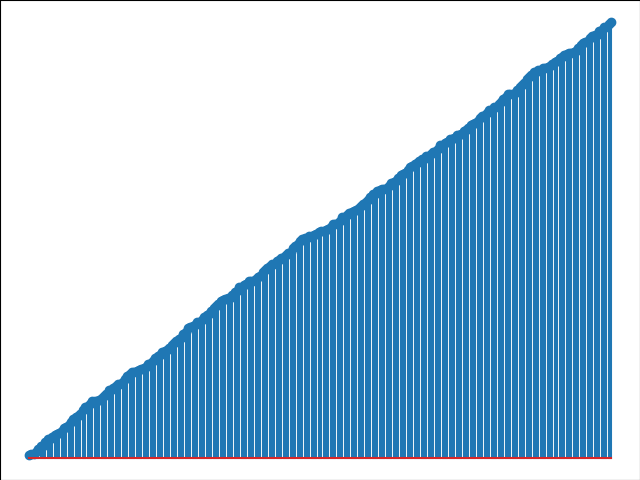

<IPython.core.display.Javascript object>


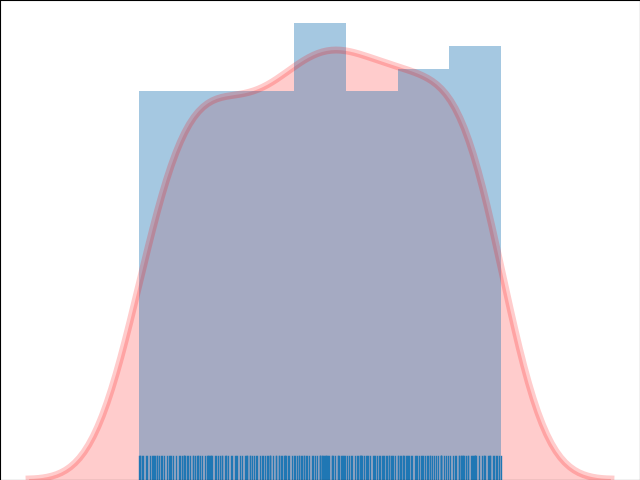

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eric/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


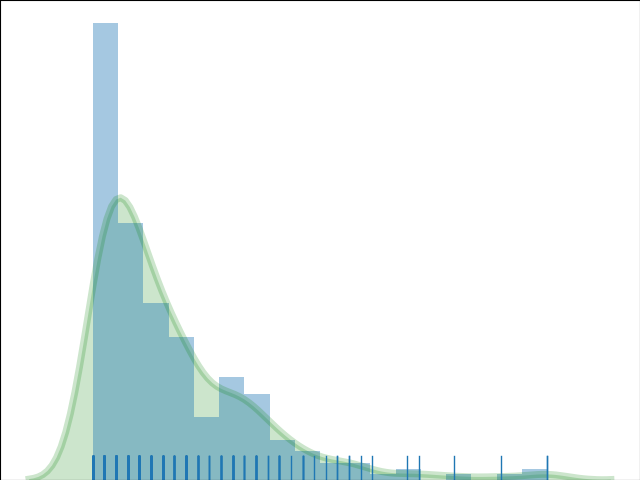

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.28695344924927 seconds ---
[   14    33   129   165   218   274   319   381   428   456   472   559
   622   690   780   815   888   921   951   971  1027  1099  1134  1180
  1250  1277  1336  1362  1458  1531  1576  1629  1699  1706  1748  1764
  1790  1833  1905  1963  2056  2062  2069  2158  2173  2244  2274  2339
  2429  2505  2559  2607  2619  2693  2767  2797  2873  2914  2980  3068
  3145  3184  3253  3325  3341  3386  3458  3530  3617  3640  3648  3669
  3682  3714  3771  3847  3920  4019  4070  4101  4107  4113  4195  4200
  4208  4229  4284  4327  4388  4430  4500  4553  4579  4637  4671  4721
  4744  4809  4811  4846  4862  4892  4903  4982  5070  5100  5101  5158
  5234  5292  5363  5397  5430  5464  5496  5546  5567  5627  5691  5746
  5832  5896  5948  5981  6044  6094  6112  6132  6182  6207  6302  6314
  6323  6398  6418  6433  6444  6454  6488  6534  6608  6664  6667  6703
  6794  6821  6893  6947  6960  6995  7058  7150  7248  7317  7390  7460
  7545  7641  765

<IPython.core.display.Javascript object>


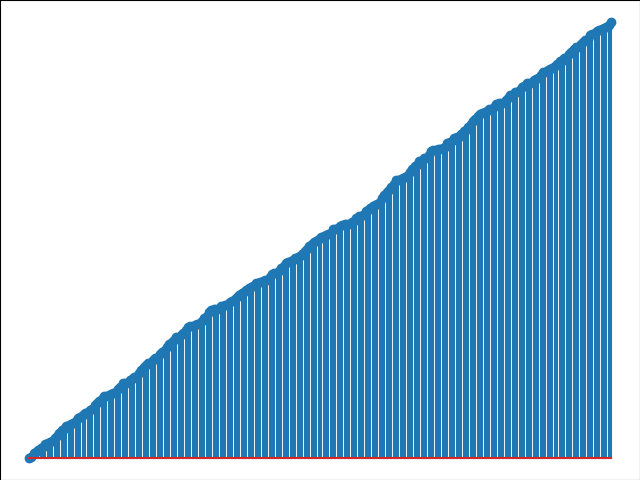

<IPython.core.display.Javascript object>


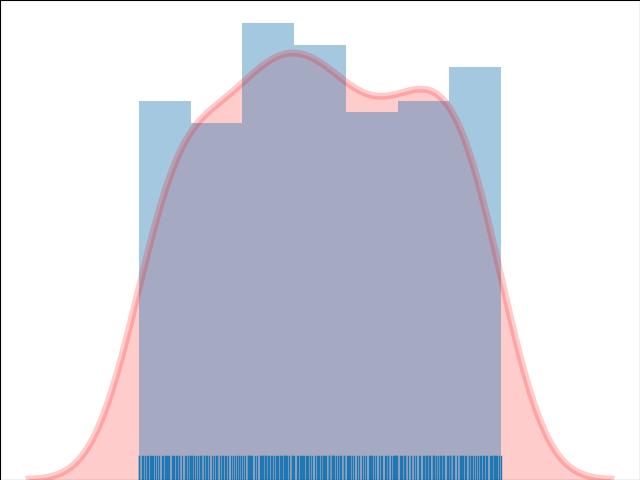

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


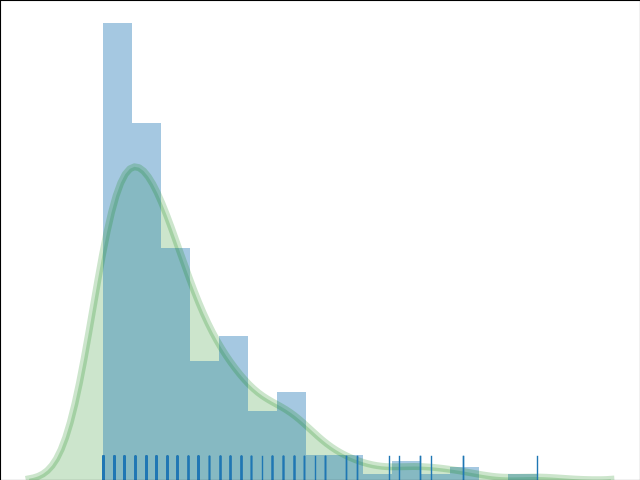

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.36747097969055 seconds ---
[   10    46   101   176   190   252   319   353   373   451   507   557
   644   698   730   803   879   971  1032  1057  1094  1184  1242  1301
  1321  1359  1364  1432  1517  1558  1657  1701  1788  1818  1829  1918
  1993  2081  2128  2221  2306  2358  2416  2505  2583  2616  2691  2702
  2763  2818  2905  2916  2972  3009  3018  3107  3164  3169  3234  3323
  3368  3407  3498  3508  3599  3641  3659  3746  3756  3844  3895  3907
  3991  4011  4055  4112  4118  4165  4241  4322  4396  4403  4405  4454
  4504  4529  4585  4620  4712  4764  4838  4905  4931  4976  5070  5165
  5250  5277  5301  5371  5442  5541  5638  5727  5821  5837  5912  5976
  6041  6130  6214  6215  6218  6313  6409  6439  6504  6548  6641  6721
  6779  6836  6842  6890  6973  6975  7054  7141  7145  7200  7259  7276
  7296  7303  7329  7331  7334  7392  7398  7479  7519  7601  7639  7656
  7703  7763  7842  7869  7879  7949  7970  8023  8094  8117  8153  8245
  8324  8410  844

<IPython.core.display.Javascript object>


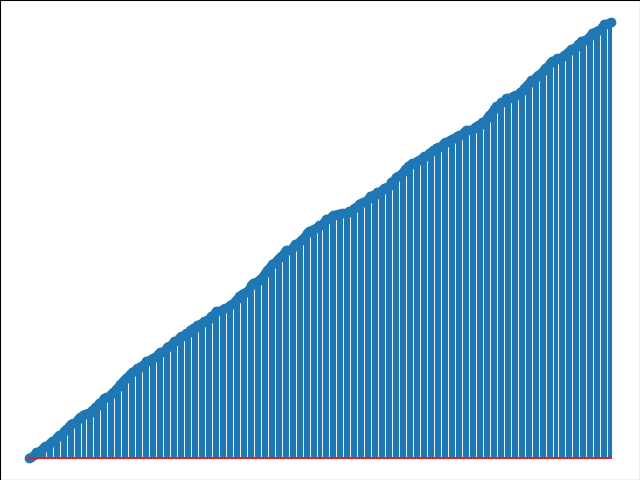

<IPython.core.display.Javascript object>


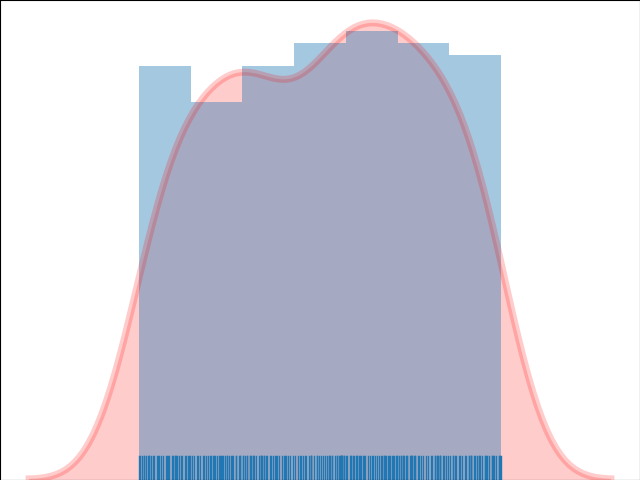

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


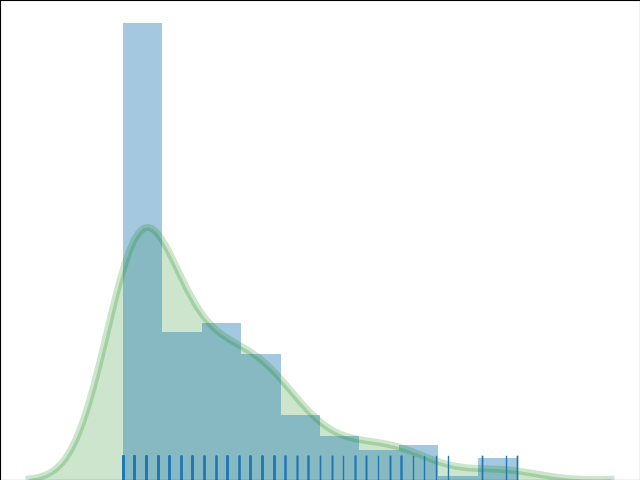

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.534849643707275 seconds ---
[   29    95   128   148   196   288   371   427   521   563   593   656
   733   828   891   905   944   959  1058  1074  1128  1204  1265  1353
  1358  1443  1466  1473  1485  1514  1603  1612  1644  1738  1823  1868
  1909  1920  1970  1988  2009  2108  2196  2273  2274  2330  2336  2368
  2388  2462  2497  2527  2532  2625  2643  2740  2750  2843  2863  2934
  2991  3019  3040  3113  3161  3245  3299  3362  3401  3407  3497  3518
  3566  3664  3756  3851  3856  3900  3924  3956  4023  4057  4120  4146
  4177  4233  4307  4318  4367  4438  4465  4518  4575  4589  4645  4662
  4687  4728  4751  4850  4888  4946  4950  5037  5064  5145  5181  5235
  5246  5299  5375  5447  5456  5479  5545  5625  5657  5741  5759  5855
  5907  5977  6038  6135  6172  6185  6267  6285  6298  6339  6369  6388
  6465  6560  6568  6591  6621  6655  6666  6674  6683  6781  6852  6925
  6927  6952  7051  7129  7214  7305  7396  7422  7492  7567  7654  7753
  7787  7837  78

<IPython.core.display.Javascript object>


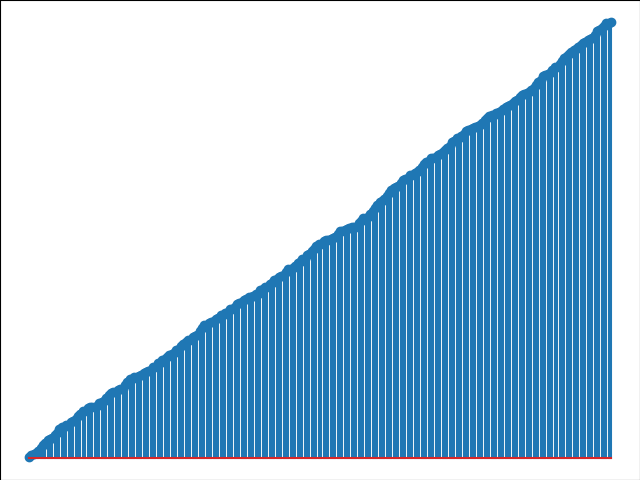

<IPython.core.display.Javascript object>


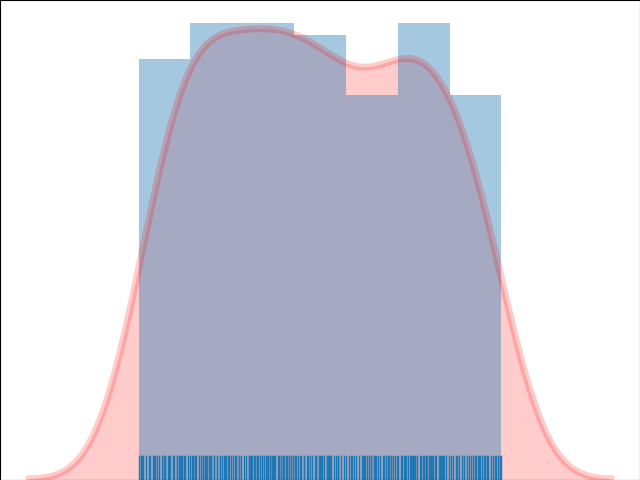

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


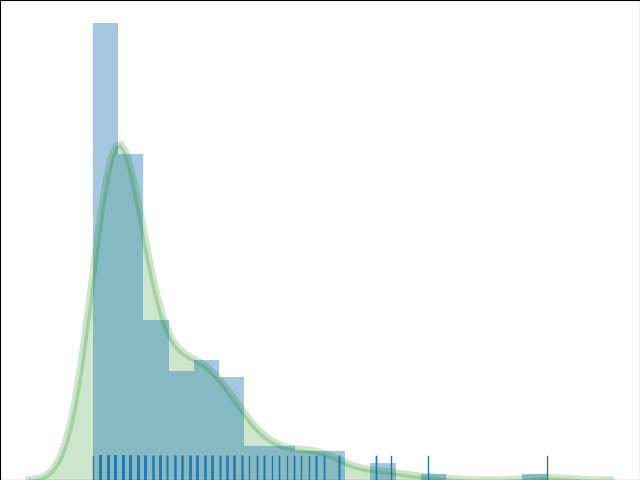

/home/eric/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--- 32.49017667770386 seconds ---


In [89]:
path='/home/eric/Documents/Networks/Viznet/VisibilityGraph-master/brown250/'
routine1(250,10)